In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)

In [4]:
df_DA_US = df_clean[(df_clean['job_title_short']=='Data Analyst') & (df_clean['job_country'] == 'United States')]
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777412,Data Analyst,Data Analyst III,"Madison, WI",via Ladders,Full-time,False,"Illinois, United States",2023-02-09 13:01:37,False,False,United States,year,90000.0,NaN,AE Business Solutions,"[sql, python, r, power bi]","{'analyst_tools': ['power bi'], 'programming':..."
777579,Data Analyst,Head of Data Analytics,"Austin, TX",via Ladders,Full-time,False,"Texas, United States",2023-10-23 05:02:56,False,True,United States,year,350000.0,NaN,Care.com,"[python, r, sql, snowflake, bigquery, tableau,...","{'analyst_tools': ['tableau', 'power bi', 'loo..."
781697,Data Analyst,Applied Scientist,"Palo Alto, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-05-04 06:04:01,False,True,United States,year,198000.0,NaN,Amazon.com,"[go, python, java, c++, r, scikit-learn, spark...","{'libraries': ['scikit-learn', 'spark', 'mxnet..."
782563,Data Analyst,Digital Communications Data Analyst,"Santa Monica, CA",via Ladders,Full-time,False,"California, United States",2023-01-11 06:00:44,False,True,United States,year,115000.0,NaN,RAND Corporation,"[sql, r, python, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."


In [7]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
782563,115000.0,tableau
782563,115000.0,power bi
782637,70000.0,vba
782637,70000.0,sql


In [19]:
df_DA_US_group = df_DA_US.groupby('job_skills').agg(
    count = ('job_skills', 'size'),
    median_salary = ('salary_year_avg', 'median')
)

df_DA_top_pay = df_DA_US_group.sort_values('median_salary',ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values('count',ascending=False).head(10).sort_values('median_salary',ascending=False)

df_DA_skills

,count,median_salary
job_skills,,
python,903,97500.0
r,566,92527.5
sql server,197,92500.0
tableau,840,92279.0
sql,1597,90000.0
sas,590,90000.0
power bi,525,90000.0
powerpoint,306,85000.0
excel,1211,83500.0


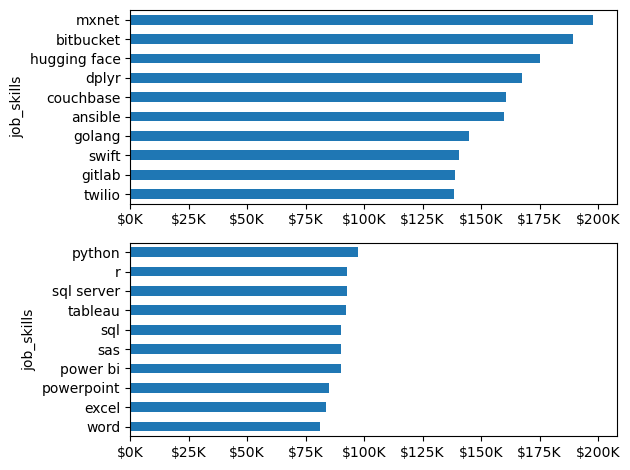

In [29]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay.plot(kind='barh', y='median_salary', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].legend().set_visible(False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))


df_DA_skills.plot(kind='barh', y='median_salary', ax=ax[1])
ax[1].invert_yaxis()
ax[1].legend().set_visible(False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

fig.tight_layout()